### Parallel Tempering Data Analysis
- load phi data for different X replicas
- calculate <phi_A * phi_B> for given X values
- plot
- find and plot heat capacity vs X (slope of <phiphi> vs X graph)
- discontinutiy (max) in heat capacity -> phase transition!

In [1]:
import numpy as np
np.seterr(divide='ignore')
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import wlcave as wlcave #need to path correctly!
import matplotlib.cm as cm
import sys

#for data processing
import os
import operator
import xlrd

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\tmhab\anaconda3\lib\site-packages\nump

#### Basic test- X = 0, 12
4/6/21

In [2]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v1chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
#20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:

sum_val = phi_chi_0_df["Vol_A"] + phi_chi_0_df["Vol_B"]
np.mean((sum_val-1)**2)

0.004591524999999947

In [4]:
phi_chi_12_df["Vol_A"] + phi_chi_12_df["Vol_B"]
# not equal to 1 due to kappa (need to increase)

0       1.14
1       0.95
2       0.90
3       0.95
4       1.02
        ... 
7995    1.15
7996    1.02
7997    1.07
7998    1.11
7999    0.90
Length: 8000, dtype: float64

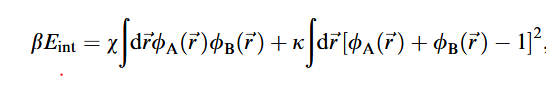

In [5]:
phiA_B_chi_0_product = phi_chi_0_df["Vol_A"] * phi_chi_0_df["Vol_B"]
phiA_B_chi_0 = phiA_B_chi_0_product.mean()

phiA_B_chi_12_product = phi_chi_12_df["Vol_A"] * phi_chi_12_df["Vol_B"]
phiA_B_chi_12 = phiA_B_chi_12_product.mean()


In [6]:
print(phiA_B_chi_0)
print(phiA_B_chi_12)

0.22901861249999975
0.0580838375000001


In [7]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_12_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)

[0.22901861249999975, 0.0580838375000001]


#### Homogenous phase, X = 0 - 6, kappa = 10, monomer volume = 0.5
4/7/21

In [8]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v2_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v3_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v4_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

phi_chi_4 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v5_chi_4.txt"
phi_chi_4_df = pd.read_csv(phi_chi_4, delimiter = "   ")

phi_chi_5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v6_chi_5.txt"
phi_chi_5_df = pd.read_csv(phi_chi_5, delimiter = "   ")

phi_chi_6 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/phi8v7_chi_6.txt"
phi_chi_6_df = pd.read_csv(phi_chi_6, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

[1.000005   0.99997125 0.9999175  0.999935   0.99988375 0.9999675
 0.9999625 ]
0.06860808017041072


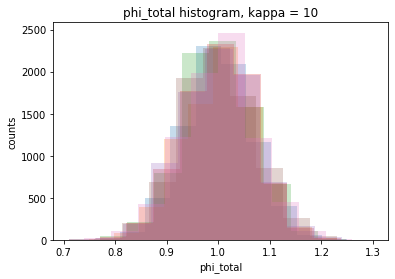

In [9]:
# vol frac = =1 analysis
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]

phiA_B_sum_list_seventh = np.array([])
phiA_B_std_list_seventh = np.array([])
for df in chi_df_list:
    df_product = df["Vol_A"] + df["Vol_B"]
    df_product.hist(alpha=0.25, grid=False)
    phiA_B_std_list_seventh = np.append(phiA_B_std_list_seventh, df_product.std(0))
    phiA_B_sum = df_product.mean()
    phiA_B_sum_list_seventh = np.append(phiA_B_sum_list_seventh, phiA_B_sum)

plt.title("phi_total histogram, kappa = 10")
plt.xlabel("phi_total")
plt.ylabel("counts")

print(phiA_B_sum_list_seventh)
print(phiA_B_std_list_seventh.mean())

In [10]:
print(phiA_B_std_list_seventh)

[0.06660334 0.06731068 0.06712214 0.06746918 0.06943271 0.07075079
 0.07156772]


In [11]:
phi_chi_0_df.std(0)

Vol_A    0.151249
Vol_B    0.151757
dtype: float64

In [12]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)

[0.22926977499999948, 0.16098972500000067, 0.1107738125000006, 0.09053867500000048, 0.0794265375000003, 0.07310970000000058, 0.06879886250000036]


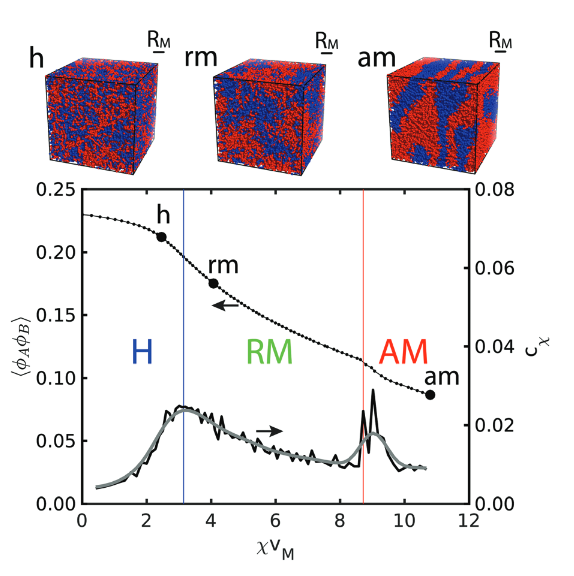

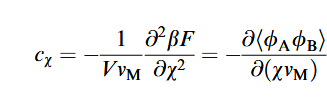

Text(0.5, 0, 'X*v_m')

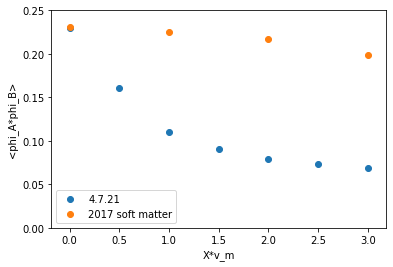

In [13]:
#nondimensionalize x axis
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume
phiA_B_list_sev = phiA_B_list
# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.7.21")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")

plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 6 (dynamiclly changed to 0 - 3.6), kappa = 10, monomer volume = 0.5
4/9/21

In [14]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v2_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v3_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v4_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

phi_chi_4 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v5_chi_4.txt"
phi_chi_4_df = pd.read_csv(phi_chi_4, delimiter = "   ")

phi_chi_5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v6_chi_5.txt"
phi_chi_5_df = pd.read_csv(phi_chi_5, delimiter = "   ")

phi_chi_6 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.9.21_ABmelt_100_kappa_17hrs/phi28v7_chi_6.txt"
phi_chi_6_df = pd.read_csv(phi_chi_6, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

[1.00003125 0.99994    1.00004125 0.9998725  0.9998625  0.99997875
 0.99995375]
0.02256698418691306


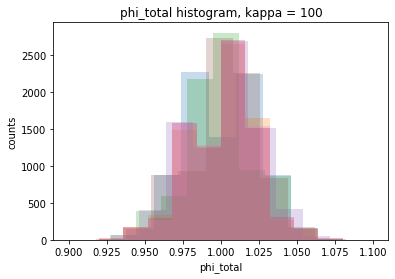

In [15]:
# tot vol frac =1 analysis
chi_df_list = [phi_chi_0_df, phi_chi_1_df, phi_chi_2_df, phi_chi_3_df, phi_chi_4_df, phi_chi_5_df, phi_chi_6_df]

phiA_B_sum_list_ninth = np.array([])
phiA_B_std_list_ninth = np.array([])
for df in chi_df_list:
    df_product = df["Vol_A"] + df["Vol_B"]
    df_product.hist(alpha=0.25, grid=False)
    phiA_B_std_list_ninth = np.append(phiA_B_std_list_ninth, df_product.std(0))
    phiA_B_sum = df_product.mean()
    phiA_B_sum_list_ninth = np.append(phiA_B_sum_list_ninth, phiA_B_sum)
    
plt.title("phi_total histogram, kappa = 100")
plt.xlabel("phi_total")
plt.ylabel("counts")

print(phiA_B_sum_list_ninth)
print(phiA_B_std_list_ninth.mean())


In [16]:
x = np.array([])
np.append(x, 1)

array([1.])

In [17]:

phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_nine = phiA_B_list

[0.2282478999999978, 0.20246192499999818, 0.14845042500000083, 0.11977721250000166, 0.10277476250000121, 0.09123586250000099, 0.08454830000000087]


Text(0.5, 0, 'X*v_m')

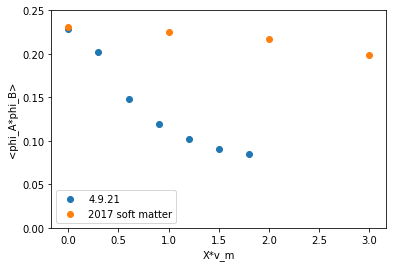

In [18]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.9.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 3 (dynamiclly changed to 0 - 1.8), kappa = 10, monomer volume = 0.5
4/11/21

In [19]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v2_chi_0.5.txt"
phi_chi_0p5_df = pd.read_csv(phi_chi_0p5, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v3_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_1p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v4_chi_1.5.txt"
phi_chi_1p5_df = pd.read_csv(phi_chi_1p5, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v5_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_2p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v6_chi_2.5.txt"
phi_chi_2p5_df = pd.read_csv(phi_chi_2p5, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.11.21_ABmelt_10_kappa_9hrs/phi18v7_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [20]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p5_df, phi_chi_1_df, phi_chi_1p5_df, phi_chi_2_df, phi_chi_2p5_df, phi_chi_3_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_elev = phiA_B_list

[0.2291005374999988, 0.22120911250000036, 0.20105572500000007, 0.1725483874999995, 0.15006424999999998, 0.13473852500000053, 0.12114483750000098]


Text(0.5, 0, 'X*v_m')

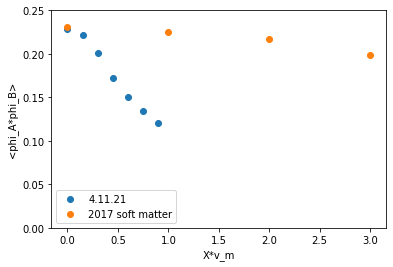

In [21]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.11.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 3, kappa = 10, monomer volume = 0.5, reptation on (therefore no PT)
4/14/21

Why reptation on mean no PT: wlcsim has a second chi energy, chi L2, which is somehow involved in modeling Maier Saupe theory. When this parameter is turned on, reptation is not able to occur (wlc_sim crashes). But, when this parameter is set to never turn on, parallel tempering does not occur (I think because we are techincally tempering over both chis). Currently cnat have both running)

In [22]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v2_chi_0.5.txt"
phi_chi_0p5_df = pd.read_csv(phi_chi_0p5, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v3_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

phi_chi_1p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v4_chi_1.5.txt"
phi_chi_1p5_df = pd.read_csv(phi_chi_1p5, delimiter = "   ")

phi_chi_2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v5_chi_2.txt"
phi_chi_2_df = pd.read_csv(phi_chi_2, delimiter = "   ")

phi_chi_2p5 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v6_chi_2.5.txt"
phi_chi_2p5_df = pd.read_csv(phi_chi_2p5, delimiter = "   ")

phi_chi_3 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.14.21_ABmelt_10_kappa_reptation_12hrs/phi18v7_chi_3.txt"
phi_chi_3_df = pd.read_csv(phi_chi_3, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [23]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p5_df, phi_chi_1_df, phi_chi_1p5_df, phi_chi_2_df, phi_chi_2p5_df, phi_chi_3_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_fort = phiA_B_list

[0.2287704124999991, 0.21311234999999962, 0.16395199999999963, 0.13159482500000125, 0.11194630000000078, 0.09900153750000074, 0.09088736250000075]


Text(0.5, 0, 'X*v_m')

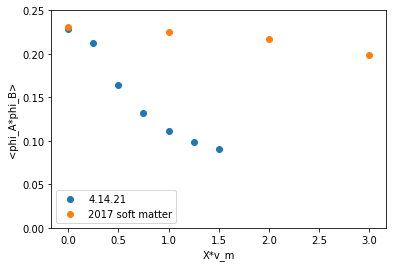

In [24]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.14.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 1, kappa = 20, monomer volume = 0.5, reptation on (therefore no PT)
4/17/21

In [25]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p11 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v2_chi_0.11.txt"
phi_chi_0p11_df = pd.read_csv(phi_chi_0p11, delimiter = "   ")

phi_chi_0p22 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v3_chi_0.22.txt"
phi_chi_0p22_df = pd.read_csv(phi_chi_0p22, delimiter = "   ")

phi_chi_0p33 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v4_chi_0.33.txt"
phi_chi_0p33_df = pd.read_csv(phi_chi_0p33, delimiter = "   ")

phi_chi_0p44 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v5_chi_0.44.txt"
phi_chi_0p44_df = pd.read_csv(phi_chi_0p44, delimiter = "   ")

phi_chi_0p55 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v6_chi_0.55.txt"
phi_chi_0p55_df = pd.read_csv(phi_chi_0p55, delimiter = "   ")

phi_chi_0p66 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v7_chi_0.66.txt"
phi_chi_0p66_df = pd.read_csv(phi_chi_0p66, delimiter = "   ")

phi_chi_0p77 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v8_chi_0.77.txt"
phi_chi_0p77_df = pd.read_csv(phi_chi_0p77, delimiter = "   ")

phi_chi_0p88 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v9_chi_0.88.txt"
phi_chi_0p88_df = pd.read_csv(phi_chi_0p88, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.18.21_ABmelt_20_kappa_reptation_17hrs/phi39v10_chi_1.00.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

# phi_chi_12 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/phi8v2chi_12.txt"
# phi_chi_12_df = pd.read_csv(phi_chi_12, delimiter = "   ")
# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [26]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p11_df, phi_chi_0p22_df, phi_chi_0p33_df, phi_chi_0p44_df, phi_chi_0p55_df, phi_chi_0p66_df, phi_chi_0p77_df, phi_chi_0p88_df, phi_chi_1_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_sevnt = phiA_B_list

[0.2279696875000001, 0.22649074999999874, 0.22491829999999927, 0.219767725, 0.2155038749999987, 0.20618409999999948, 0.1967791124999994, 0.18515323750000015, 0.17494875000000054, 0.1658480499999992]


Text(0.5, 0, 'X*v_m')

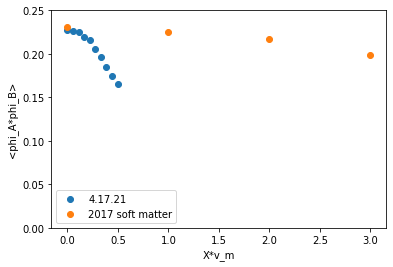

In [27]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.17.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

#### Homogenous phase, X = 0 - 1, kappa = 20, monomer volume = 0.5, reptation on (therefore no PT), N_m = 0.05
4/20/21

In [28]:
phi_chi_0 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v1_chi_0.txt"
phi_chi_0_df = pd.read_csv(phi_chi_0, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p16 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v2_chi_0.166.txt"
phi_chi_0p16_df = pd.read_csv(phi_chi_0p16, delimiter = "   ")

phi_chi_0p33 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v3_chi_0.333.txt"
phi_chi_0p33_df = pd.read_csv(phi_chi_0p33, delimiter = "   ")

phi_chi_0p50 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v4_chi_0.5.txt"
phi_chi_0p50_df = pd.read_csv(phi_chi_0p50, delimiter = "   ")

phi_chi_0p66 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v5_chi_0.667.txt"
phi_chi_0p66_df = pd.read_csv(phi_chi_0p66, delimiter = "   ")

phi_chi_0p83 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v6_chi_0.833.txt"
phi_chi_0p83_df = pd.read_csv(phi_chi_0p83, delimiter = "   ")

phi_chi_1 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.20.21_ABmelt_20_kappa_reptation_flexibility_8hrs/phi14v7_chi_1.txt"
phi_chi_1_df = pd.read_csv(phi_chi_1, delimiter = "   ")

# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [29]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0_df, phi_chi_0p16_df, phi_chi_0p33_df, phi_chi_0p50_df, phi_chi_0p66_df, phi_chi_0p83_df, phi_chi_1_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_twent = phiA_B_list

[0.2299009624999995, 0.22625459999999928, 0.22208107499999874, 0.2117771749999994, 0.19134316249999908, 0.17283276249999963, 0.15782067500000005]


Text(0.5, 0, 'X*v_m')

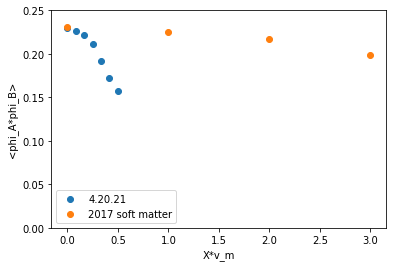

In [30]:
#nondimensionalize x axis
chi_vals = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.20.21")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

k = 20, repatation on, number of kuhn lengths per monomer N_m = 0.05 (rigid). NO PT

### plotting all results (failed PTs)

Text(0.5, 0, 'X*v_m')

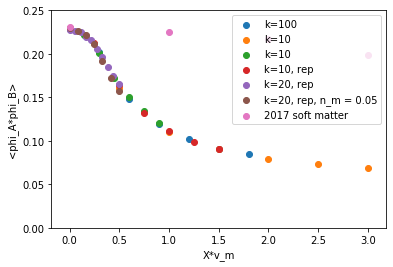

In [31]:
#nondimensionalize x axis
chi_vals_nine = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6]) #dynamic change!!
chi_vals_sev = np.array([0, 1, 2, 3, 4, 5, 6])
chi_vals_elev = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8]) #dynamic change!!
chi_vals_fort = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume

chi_v_m_nine = chi_vals_nine *monomer_volume
chi_v_m_sev = chi_vals_sev * monomer_volume
chi_v_m_elev = chi_vals_elev * monomer_volume
chi_v_m_fort = chi_vals_fort * monomer_volume
chi_v_m_sevnt = chi_vals_sevnt * monomer_volume
chi_v_m_twent = chi_vals_twent * monomer_volume

# my sim values
plt.scatter(chi_v_m_nine, phiA_B_list_nine, label = "k=100")#"4.9.21")
plt.scatter(chi_v_m_sev, phiA_B_list_sev, label = "k=10")
plt.scatter(chi_v_m_elev, phiA_B_list_elev, label = "k=10")
plt.scatter(chi_v_m_fort, phiA_B_list_fort, label = "k=10, rep")
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

## proof of off by factor of 5

Text(0.5, 0, 'X*v_m')

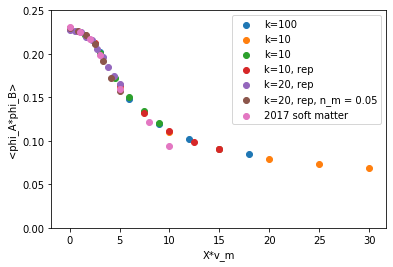

In [32]:
#nondimensionalize x axis USING 0.2
chi_vals_nine = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6]) #dynamic change!!
chi_vals_sev = np.array([0, 1, 2, 3, 4, 5, 6])
chi_vals_elev = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8]) #dynamic change!!
chi_vals_fort = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3])
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume

chi_v_m_nine = chi_vals_nine *5
chi_v_m_sev = chi_vals_sev * 5
chi_v_m_elev = chi_vals_elev * 5
chi_v_m_fort = chi_vals_fort * 5
chi_v_m_sevnt = chi_vals_sevnt * 5
chi_v_m_twent = chi_vals_twent * 5

# my sim values
plt.scatter(chi_v_m_nine, phiA_B_list_nine, label = "k=100")#"4.9.21")
plt.scatter(chi_v_m_sev, phiA_B_list_sev, label = "k=10")
plt.scatter(chi_v_m_elev, phiA_B_list_elev, label = "k=10")
plt.scatter(chi_v_m_fort, phiA_B_list_fort, label = "k=10, rep")
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3, 5, 8, 10]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199, 0.16, 0.122, 0.094] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")

plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

addition of rigidity

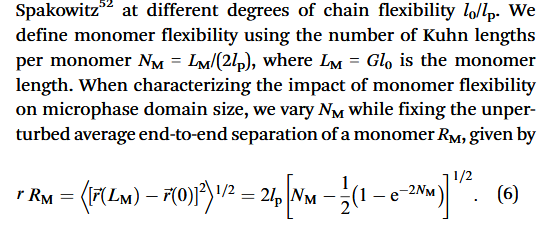

Text(0.5, 0, 'X*v_m')

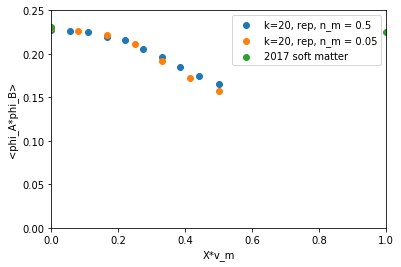

In [33]:
#nondimensionalize x axis
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume

chi_v_m_sevnt = chi_vals_sevnt * monomer_volume
chi_v_m_twent = chi_vals_twent * monomer_volume

# my sim values
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep, n_m = 0.5")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.ylim((0, .25))
plt.xlim((0, 1))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

#### Impact of kappa

Text(0.5, 0, 'X*v_m')

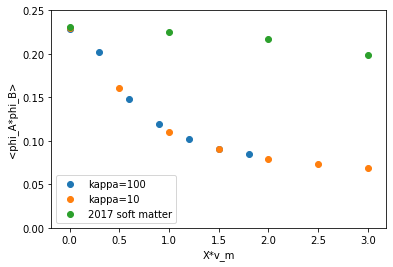

In [34]:
#nondimensionalize x axis
chi_vals_nine = np.array([0, 0.6, 1.2, 1.8, 2.4, 3, 3.6]) #dynamic change!!
chi_vals_sev = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m_nine = chi_vals_nine *monomer_volume
chi_v_m_sev = chi_vals_sev * monomer_volume
# my sim values
plt.scatter(chi_v_m_nine, phiA_B_list_nine, label = "kappa=100")#"4.9.21")
plt.scatter(chi_v_m_sev, phiA_B_list_sev, label = "kappa=10")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

Text(0.5, 0, 'X*v_m')

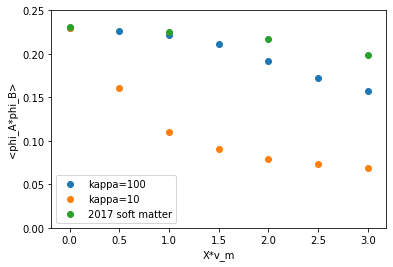

In [35]:
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume
# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "kappa=100")#"4.9.21")
plt.scatter(chi_v_m, phiA_B_list_sev, label = "kappa=10")
plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")

Text(0.5, 0, 'X*v_m')

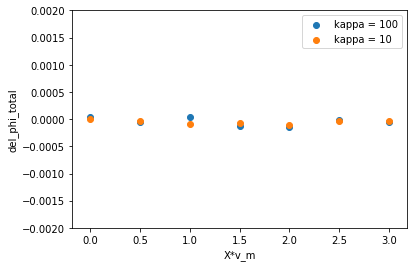

In [36]:
# mean phi total deviation from 1
#nondimensionalize x axis
chi_vals = np.array([0, 1, 2, 3, 4, 5, 6])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_sum_list_ninth - 1, label = "kappa = 100")#, 4.9.21, no PT")
plt.scatter(chi_v_m, phiA_B_sum_list_seventh - 1, label = "kappa = 10")#, 4.7.21, no PT")

plt.ylim((-.002, .002))

plt.legend()
plt.ylabel("del_phi_total")
plt.xlabel("X*v_m")
# almost no differnece between differnet kappas for keeping vol fraction = 1-> but very dif distribution

# OLD SIM

#### Homogenous phase, X = 0 - 1, kappa = 20, monomer volume = 0.5, reptation on (with PT!!), N_m = 0.05
4/23/21

In [37]:
phi_chi_0p01 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v1_chi_0.01.txt"
phi_chi_0p01_df = pd.read_csv(phi_chi_0p01, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p06 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v2_chi_0.06.txt"
phi_chi_0p06_df = pd.read_csv(phi_chi_0p06, delimiter = "   ")

phi_chi_0p11 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v3_chi_0.11.txt"
phi_chi_0p11_df = pd.read_csv(phi_chi_0p11, delimiter = "   ")

phi_chi_0p16 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v4_chi_0.16.txt"
phi_chi_0p16_df = pd.read_csv(phi_chi_0p16, delimiter = "   ")

phi_chi_0p2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v5_chi_0.2.txt"
phi_chi_0p2_df = pd.read_csv(phi_chi_0p2, delimiter = "   ")

phi_chi_0p25 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v6_chi_0.25.txt"
phi_chi_0p25_df = pd.read_csv(phi_chi_0p25, delimiter = "   ")

phi_chi_0p29 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.23.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi154v7_chi_0.29.txt"
phi_chi_0p29_df = pd.read_csv(phi_chi_0p29, delimiter = "   ")

# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [38]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0p01_df, phi_chi_0p06_df, phi_chi_0p11_df, phi_chi_0p16_df, phi_chi_0p2_df, phi_chi_0p25_df, phi_chi_0p29_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_twent_three = phiA_B_list

[0.2287264624999997, 0.22862248749999958, 0.2266990499999986, 0.22724597499999985, 0.22593198749999896, 0.22456262499999835, 0.22196004999999935]


Text(0.5, 0, 'X*v_m')

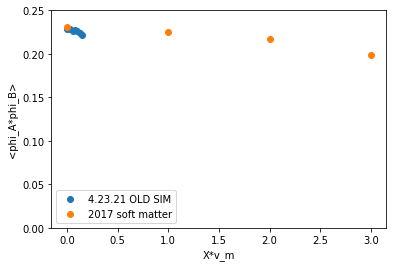

In [39]:
#nondimensionalize x axis
chi_vals = np.array([0.01, 0.06, 0.11, 0.16, 0.2, 0.25, 0.29])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.23.21 OLD SIM")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

Text(0.5, 0, 'X*v_m')

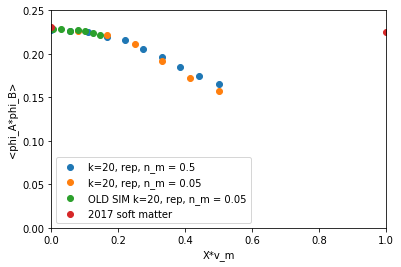

In [40]:
#nondimensionalize x axis
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])
chi_vals_twent_three = np.array([0.01, 0.06, 0.11, 0.16, 0.2, 0.25, 0.29])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume

chi_v_m_sevnt = chi_vals_sevnt * monomer_volume
chi_v_m_twent = chi_vals_twent * monomer_volume
chi_v_m_twent_three = chi_vals_twent_three * monomer_volume

# my sim values
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep, n_m = 0.5")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.scatter(chi_v_m_twent_three, phiA_B_list_twent_three, label = "OLD SIM k=20, rep, n_m = 0.05")
plt.ylim((0, .25))
plt.xlim((0, 1))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

#### Homogenous phase, X = 0 - 1, kappa = 20, monomer volume = 0.5, reptation on (with PT!!), N_m = 0.05
4/24/21

In [41]:
phi_chi_0p43 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.24.21_ABmelt_20_kappa_reptation_Nm=0.05_5hrs_OLD/phi37v1_chi_0.43.txt"
phi_chi_0p43_df = pd.read_csv(phi_chi_0p43, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p56 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.24.21_ABmelt_20_kappa_reptation_Nm=0.05_5hrs_OLD/phi37v7_chi_0.56.txt"
phi_chi_0p56_df = pd.read_csv(phi_chi_0p56, delimiter = "   ")


# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [42]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0p43_df, phi_chi_0p56_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_twent_four = phiA_B_list

[0.2163964625, 0.20169666249999924]


Text(0.5, 0, 'X*v_m')

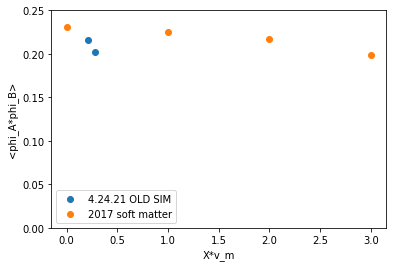

In [43]:
#nondimensionalize x axis
chi_vals = np.array([0.43, 0.56])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.24.21 OLD SIM")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

Text(0.5, 0, 'X*v_m')

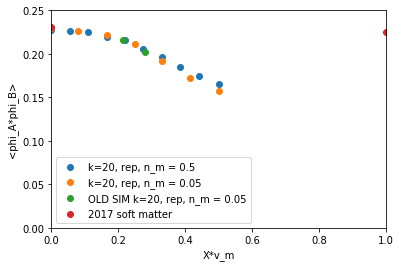

In [44]:
#nondimensionalize x axis
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])
chi_vals_twent_four = np.array([0.43, 0.56])

bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume

chi_v_m_sevnt = chi_vals_sevnt * monomer_volume
chi_v_m_twent = chi_vals_twent * monomer_volume
chi_v_m_twent_four = chi_vals_twent_four * monomer_volume

# my sim values
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep, n_m = 0.5")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.scatter(chi_v_m_twent_four, phiA_B_list_twent_four, label = "OLD SIM k=20, rep, n_m = 0.05")
plt.ylim((0, .25))
plt.xlim((0, 1))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

Text(0.5, 0, 'X*v_m')

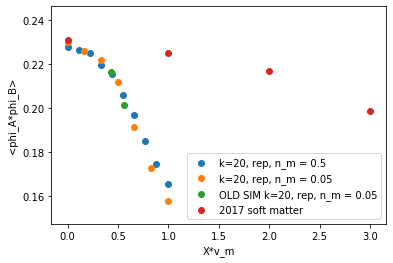

In [45]:
# TRYING 1 DIVISION
#nondimensionalize x axis
chi_vals_sevnt = np.array([0, 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 1])
chi_vals_twent = np.array([0, 0.16, 0.33, 0.5, 0.66, 0.83, 1])
chi_vals_twent_four = np.array([0.43, 0.56])

# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume

chi_v_m_sevnt = chi_vals_sevnt 
chi_v_m_twent = chi_vals_twent 
chi_v_m_twent_four = chi_vals_twent_four 

# my sim values
plt.scatter(chi_v_m_sevnt, phiA_B_list_sevnt, label = "k=20, rep, n_m = 0.5")
plt.scatter(chi_v_m_twent, phiA_B_list_twent, label = "k=20, rep, n_m = 0.05")
plt.scatter(chi_v_m_twent_four, phiA_B_list_twent_four, label = "OLD SIM k=20, rep, n_m = 0.05")
#plt.ylim((0, .25))
#plt.xlim((0, 1))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation fr

For successful PT, the range must be ~ 0.1294 Chi
SO, try running a sim from 0 to 3 with like 50 

#### Homogenous phase, X = 0 - 1.2, kappa = 20, monomer volume = 0.5, reptation on (with PT- 50 replicas), N_m = 0.05
4/25/21

In [46]:
phi_chi_0p02 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.25.21_ABmelt_20_kappa_reptation_Nm=0.05_15hrs_OLD/phi21v1_chi_0.02.txt"
phi_chi_0p02_df = pd.read_csv(phi_chi_0p02, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p7 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.25.21_ABmelt_20_kappa_reptation_Nm=0.05_15hrs_OLD/phi21v25_chi_0.7.txt"
phi_chi_0p7_df = pd.read_csv(phi_chi_0p7, delimiter = "   ")

phi_chi_1p2 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.25.21_ABmelt_20_kappa_reptation_Nm=0.05_15hrs_OLD/phi21v49_chi_1.2.txt"
phi_chi_1p2_df = pd.read_csv(phi_chi_1p2, delimiter = "   ")

# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [47]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0p02_df,phi_chi_0p7_df, phi_chi_1p2_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_twent_five = phiA_B_list

[0.22925227499999892, 0.18669596249999995, 0.1398724750000007]


Text(0.5, 0, 'X*v_m')

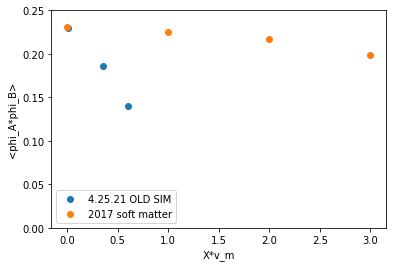

In [48]:
#nondimensionalize x axis
chi_vals = np.array([0.02, 0.7, 1.2])


bead_volume = 0.1 # simulation units
monomer_volume = 5 * bead_volume
chi_v_m = chi_vals*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.25.21 OLD SIM")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

0-1.2, great replica exchange. still not reproducing.
Possible next step:
- re confimr all parameters are correct in old sim
- turn off dynamic changing of variables
try a hail mary full range lol

TRYING 0.1 offset

Text(0.5, 0, 'X*v_m')

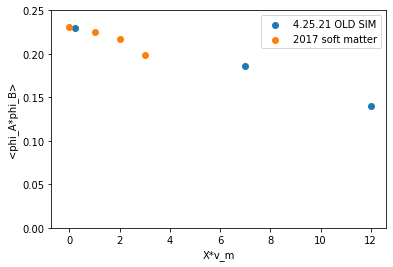

In [49]:
#nondimensionalize x axis
chi_vals = np.array([0.02, 0.7, 1.2])


# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume


chi_v_m = chi_vals/0.1#*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.25.21 OLD SIM")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

TRYING no offset(asuuming result is nondimensinalized)

saying that, baesd on hamiltonia file, the chi we are defining is E/ vol bin
BUT the vol bin = 1, so the nondimensionalized energy is just X

Text(0.5, 0, 'X*v_bin')

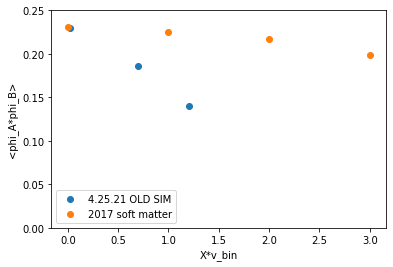

In [50]:
#nondimensionalize x axis
chi_vals = np.array([0.02, 0.7, 1.2])


# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume


chi_v_m = chi_vals#/0.2#*monomer_volume

# my sim values
plt.scatter(chi_v_m, phiA_B_list, label = "4.25.21 OLD SIM")

plt.ylim((0, .25))

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199 ] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_bin")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

In [51]:
#PROCESS NEW SIM WITH CHI times VOL BIN (vol bin = 1, chi i E/v bin)

#### Homogenous phase, X = 0 - 8, kappa = 20, monomer volume = 0.5, reptation on (with PT- 50 replicas), N_m = 0.05

only equilibration (replica exchange) from 0 - 0.67
4/26/21

In [52]:
phi_chi_0p24 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v49"
phi_chi_0p24_df = pd.read_csv(phi_chi_0p24, delimiter = "   |  -", header=0, names = ["g", "h"])

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [53]:
phi_chi_0p24_df

,g,h
0,0.12,0.86
1,0.05,0.87
2,0.21,0.82
3,0.07,0.95
4,0.05,0.98
...,...,...
7994,1.05,0.00
7995,0.96,0.00
7996,1.00,0.00
7997,1.07,0.00


In [54]:
phi_chi_0p24 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v1_chi_0.24.txt"
phi_chi_0p24_df = pd.read_csv(phi_chi_0p24, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_0p61 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v15_chi_0.61.txt"
phi_chi_0p61_df = pd.read_csv(phi_chi_0p61, delimiter = "   ")

phi_chi_1p63 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v23_chi_1.63.txt"
phi_chi_1p63_df = pd.read_csv(phi_chi_1p63, delimiter = "   ")

phi_chi_2p13 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v25_chi_2.13.txt"
phi_chi_2p13_df = pd.read_csv(phi_chi_2p13, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_3p39 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v30_chi_3.39.txt"
phi_chi_3p39_df = pd.read_csv(phi_chi_3p39, delimiter = "   ")

phi_chi_4p67 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v35_chi_4.67.txt"
phi_chi_4p67_df = pd.read_csv(phi_chi_4p67, delimiter = "   ")

phi_chi_5p95 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v40_chi_5.95.txt"
phi_chi_5p95_df = pd.read_csv(phi_chi_5p95, delimiter = "   ")
#phi_chi_0_data = np.loadtxt(phi_chi_0)

phi_chi_8p09 = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.26.21_ABmelt_20_kappa_reptation_Nm=0.05_24hrs_OLD/phi28v49_chi_8.09.txt"
phi_chi_8p09_df = pd.read_csv(phi_chi_8p09, delimiter = "   ")


# #20x20x20 bins- should have 8000 pairs of phis

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
C:\Users\tmhab\anaconda3\lib\site-packages\i

In [55]:
# make list of dataframes, for each frame in list calc product and mean, append to a list of <phi_Aphi_B> vals
chi_df_list = [phi_chi_0p24_df,phi_chi_0p61_df, phi_chi_1p63_df, phi_chi_2p13_df, phi_chi_3p39_df, phi_chi_4p67_df, phi_chi_5p95_df, phi_chi_8p09_df]
phiA_B_list = []
for df in chi_df_list:
    df_product = df["Vol_A"] * df["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

print(phiA_B_list)
phiA_B_list_twent_six = phiA_B_list

[0.22515078749999953, 0.2002243499999993, 0.12145708750000092, 0.10501167500000026, 0.09101618750000073, 0.08208128750000107, 0.07673353750000038, 0.0683292500000004]


Text(0.5, 0, 'X*v_m')

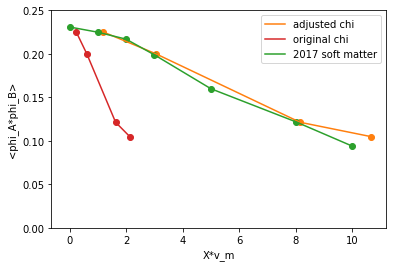

In [56]:
##### nondimensionalize x axis
chi_vals = np.array([0.24, 0.61, 1.63, 2.13, 3.39, 4.67, 5.95, 8.09])


# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume

chi_v_m = chi_vals/0.2#*monomer_volume

# my sim values
plt.scatter(chi_v_m[:4], phiA_B_list[:4], color = "tab:orange")
plt.plot(chi_v_m[:4], phiA_B_list[:4], label = "adjusted chi", color = "tab:orange")

plt.scatter(chi_vals[:4], phiA_B_list[:4], color = "tab:red")
plt.plot(chi_vals[:4], phiA_B_list[:4], label = "original chi", color = "tab:red")

plt.ylim((0, .25))
#plt.vlines(0.6562*5, 0, 0.25, color = "tab:blue")
# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3, 5, 8, 10]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199, 0.16, 0.122, 0.094] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, color = "tab:green")
plt.plot(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter", color = "tab:green")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

Text(0.5, 0, 'X*v_m')

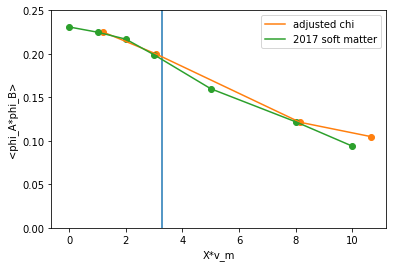

In [57]:
##### nondimensionalize x axis
chi_vals = np.array([0.24, 0.61, 1.63, 2.13, 3.39, 4.67, 5.95, 8.09])


# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume

chi_v_m = chi_vals/0.2#*monomer_volume

# my sim values
plt.scatter(chi_v_m[:4], phiA_B_list[:4], color = "tab:orange")
plt.plot(chi_v_m[:4], phiA_B_list[:4], label = "adjusted chi", color = "tab:orange")
#plt.scatter(chi_vals[:4], phiA_B_list[:4], label = "original chi")

plt.ylim((0, .25))
plt.vlines(0.6562*5, 0, 0.25, color = "tab:blue")
# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3, 5, 8, 10]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199, 0.16, 0.122, 0.094] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, color = "tab:green")
plt.plot(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter", color = "tab:green")


plt.legend()
plt.ylabel("<phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

## FULL RANGE
kappa = 20, monomer volume = 0.5, reptation on (with PT- 89 replicas), N_m = 0.05
equilibration through the full range

5/3/21

In [58]:
# path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.3.21_ABmelt_fully_reproduced_48hrs_OLD/all_phis/"
# rephist_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.3.21_ABmelt_fully_reproduced_48hrs_OLD/finalrepp.xlsx"
# r_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/4.7.21_ABmelt_low_kappa_4hrs/rs/"

## FULL RANGE- tail fixed 72 hrs
kappa = 20, monomer volume = 0.5, reptation on (with PT- 89 replicas), N_m = 0.05
equilibration through the full range

5/8/21

In [59]:
path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_72hrs_OLD/all_phis/"
rephist_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_72hrs_OLD/finalrep.xlsx"
r_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_72hrs_OLD/all_rs/"

## FULL RANGE- tail fixed 96 hrs
kappa = 20, monomer volume = 0.5, reptation on (with PT- 89 replicas), N_m = 0.05
equilibration through the full range

5/8/21

In [83]:
path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_96hrs_OLD/all_phis/"
rephist_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_96hrs_OLD/finalrep.xlsx"
r_path = "C:\\users/tmhab/wlcsim_membrane/data/AB_melt_phase_diagram/5.8.21_ABmelt_fully_reproduced_96hrs_OLD/all_rs/"

In [84]:
'''PREPROCESSING:
phi files- copy all into one folder
get chi values from repHistory (copy last exchange into new notepad, import into excel, save)
''' 
# Change the directory
os.chdir(path)

phi_df_list = []
v_val_list = []
for file in os.listdir():
    file_path = f"{path}\{file}"
    
    v_val = file_path[-2:]
    if v_val[0] == "v":
        v_val = v_val[1]
    v_val = float(v_val) # smallest v = smallest chi
        
    file_df = pd.read_csv(file_path, delimiter = "   |  -", names = ["Vol_A", "Vol_B"])
    
    phi_df_list.append([v_val, file_df])
    v_val_list.append(v_val)

phi_df_list = sorted(phi_df_list, key=operator.itemgetter(0))
v_val_list = sorted(v_val_list)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [85]:

wb = xlrd.open_workbook(rephist_path)
ws = wb.sheet_by_index(0)
chi_val_list = ws.col_values(4)[1:]

In [86]:
phiA_B_list = []
for pair in phi_df_list:
    df_product = pair[1]["Vol_A"] * pair[1]["Vol_B"]
    phiA_B = df_product.mean()
    phiA_B_list.append(phiA_B)

phiA_B_list_full_range = phiA_B_list


Text(0.5, 0, 'X*v_m')

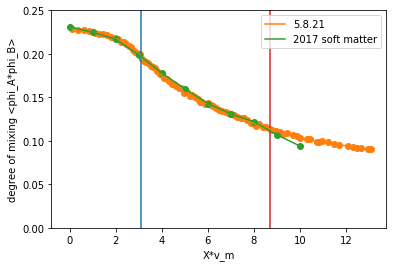

In [87]:
##### nondimensionalize x axis
chi_vals = np.array(chi_val_list)

# bead_volume = 0.1 # simulation units
# monomer_volume = 5 * bead_volume
# chi = E/v_bead-> chi * vm = E/v_bead * (5 * v_bead) (E in terms of kTs!!)

chi_v_m = chi_vals/0.2 

# my sim values
plt.scatter(chi_v_m, phiA_B_list, color = "tab:orange")
plt.plot(chi_v_m, phiA_B_list, label = "5.8.21", color = "tab:orange")

plt.ylim((0, .25))
#plt.vlines(0.6562*5, 0, 0.25, color = "tab:blue")

# Estimating paper values
chi_v_m_paper = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
phiA_B_paper = [0.231, 0.225, 0.217, 0.199, 0.178, 0.16, 0.143, 0.131, 0.122, 0.107, 0.094] #imageJ
plt.scatter(chi_v_m_paper, phiA_B_paper, color = "tab:green")
plt.plot(chi_v_m_paper, phiA_B_paper, label = "2017 soft matter", color = "tab:green")

plt.vlines(3.1, 0, 0.25, color = "tab:blue")
plt.vlines(8.71, 0, 0.25, color = "tab:red")
plt.legend()
plt.ylabel("degree of mixing <phi_A*phi_B>")
plt.xlabel("X*v_m")
# significant deviation from paper. kappa val/ lack of parallel tempering (too big of X interval)

## HEAT CAPACITY

In [88]:
def slope(x1, y1, x2, y2):
    m = (y2-y1)/(x2-x1)
    return m


slope_value=np.array([])
x = chi_v_m
y = phiA_B_list
for i in range(len(y)-1):
    i += 1
    v=slope(x[i], y[i], x[i-1], y[i-1])
    slope_value = np.append(slope_value, v)


Text(0.5, 0, 'X*v_m')

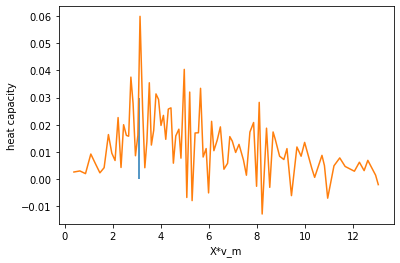

In [89]:
plt.vlines(3.1, 0, 0.03, color = "tab:blue")
plt.plot(chi_v_m[1:], slope_value*-1, label = "5.3.21", color = "tab:orange")
plt.ylabel("heat capacity")
plt.xlabel("X*v_m")
#plt.ylim((0, 0.25))

#### Gaussian kernel

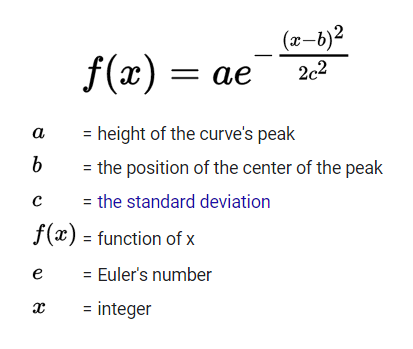

Text(0.5, 0, 'X*v_m')

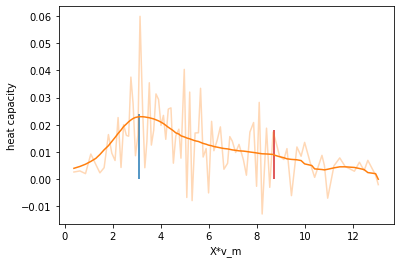

In [90]:
y_vals = slope_value*-1
x_vals = chi_v_m[1:]
sigma = 0.45 #paper- std dv = 0.45

smoothed_vals = np.zeros(len(y_vals)+1)
for i, x_val in enumerate(x_vals):
    kernel = np.exp(-(x_vals - x_val) ** 2 / (2 * sigma ** 2)) #gaussian centerd at each point
    kernel = kernel / sum(kernel) #normalize
    smoothed_vals[i] = sum(y_vals * kernel)
    
plt.plot(x_vals, smoothed_vals[1:], color= "tab:orange")

plt.vlines(3.1, -0.00, 0.024, color = "tab:blue") #post- kernel peaks, using image-J
plt.vlines(8.71, -0.00, 0.018, color = "tab:red")
plt.plot(chi_v_m[1:], slope_value*-1, label = "5.3.21", color = "tab:orange", alpha=0.3)
plt.ylabel("heat capacity")
plt.xlabel("X*v_m")

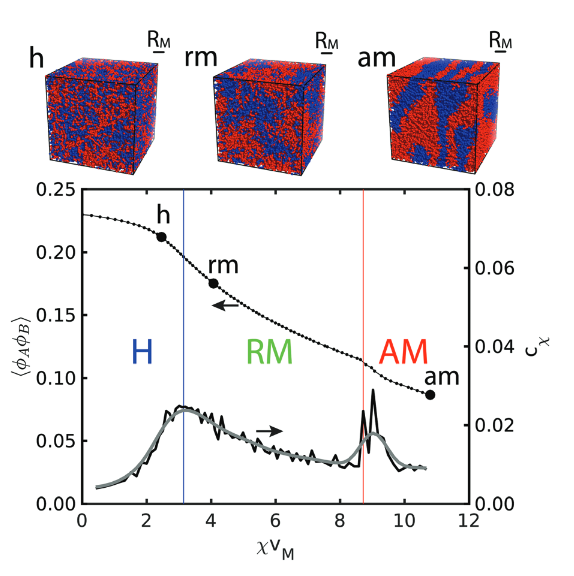

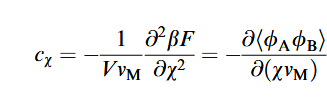

## Radius of Gyration vs Chi
(adapted form Mean Square Interberad Ditance notebook)
interbead dist. version

In [91]:
class Bead:
    '''
    '''
    def __init__(self, x, y, z, bead_type):
        self.x = x
        self.y = y
        self.z = z
        self.bead_type = bead_type
    
    def print_bead(self):
        print("x: ", self.x)
        print("Y: ", self.y)
        print("Z: ", self.z)
        
class Polymer:
    '''
    '''
    
    def __init__(self, bead_list):
        self.bead_list = []
        self.bead_list = bead_list
        bead_coor_array = np.zeros((len(bead_list), 3))
        bead_types = np.zeros(len(bead_list))
        for i, bead in enumerate(bead_list):
            bead_coor_array[i, 0] = bead.x
            bead_coor_array[i, 1] = bead.y
            bead_coor_array[i, 2] = bead.z
            bead_types[i] = bead.bead_type
        self.bead_coor_array = bead_coor_array
        self.bead_types = bead_types
    
    def poly_print_bead_list(self):
        for i, bead in enumerate(self.bead_list):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z) + " Type: " + str(bead.bead_type))
   
    def find_center_of_mass(self): 
        '''
        Find the center of mass for a given polymer chain wrt to a specific bead type
        '''
        #print("IN COM METHOD")
        X_bead = self.bead_coor_array[:,0]#[self.bead_types==bead_num] 
        Y_bead = self.bead_coor_array[:,1]#[self.bead_types==bead_num]
        Z_bead = self.bead_coor_array[:,2]#[self.bead_types==bead_num]
        
        x_center = np.mean(X_bead)
        y_center = np.mean(Y_bead)
        z_center = np.mean(Z_bead)
        
        #print("COM: ", [x_center,y_center,z_center])
        return [x_center,y_center,z_center]
    
#     def find_rg2(self): # INCORRECT- need to divid by total num of beads
#         center_of_mass = self.find_center_of_mass()
#         displacements = self.bead_coor_array - center_of_mass
#         displacements_square = np.square(displacements)
#         final_disp = np.sum(displacements_square, axis=1) #final disp square of sub polymer beads
        
#         radius_g_2 = np.sum(final_disp)
        
#         return radius_g_2
    
    def Radius_of_gyration_2(self):
        center_of_mass_point = self.find_center_of_mass()
        X_bead = self.bead_coor_array[:,0]#[self.bead_types==bead_num] 
        Y_bead = self.bead_coor_array[:,1]#[self.bead_types==bead_num]
        Z_bead = self.bead_coor_array[:,2]#[self.bead_types==bead_num]
        
        n = X_bead.shape[0]
        Rg2 = (np.sum((X_bead - center_of_mass_point[0])**2 + 
                    (Y_bead - center_of_mass_point[1])**2 + (Z_bead - center_of_mass_point[2])**2)/n)
        #print("IN RADIUG OF GYR METHOD")
        #print("Rg2:", Rg2)
        return Rg2
    
class PolymerNetwork:
    """
    This represents the postions of bead and their type (time invariant)
    
    Parameters
    ----------
    X : float [array] X 
    """
    
    def __init__(self,X,Y,Z, Beads, beads_per_polymer=40, persistence_length=2.03):
        self.X = X
        self.Y = Y
        self.Z = Z
        self.Beads = Beads
        self.beads_per_polymer = beads_per_polymer
        self.bead_list = []
        self.polymer_list = []
        self.persistence_length = persistence_length
        self.create_beads()
        self.create_polymers()
        
        self.density = Beads.shape[0]/((max(X)-min(X)) * (max(Y)-min(Y)) * (max(Z)-min(Z)))
        
    def visualize(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.X[self.Beads==0], self.Y[self.Beads==0], self.Z[self.Beads==0],color='y')
        ax.scatter3D(self.X[self.Beads==1], self.Y[self.Beads==1], self.Z[self.Beads==1],color='r')
        ax.scatter3D(self.X[self.Beads==2], self.Y[self.Beads==2], self.Z[self.Beads==2],color='b')
        
    def nearest_neighbor(self,bead_num,radius):
        '''
        Find the average number of beads that surround a bead of the same type within the radius specified
        '''
        X_bead = self.X[Beads==bead_num]
        Y_bead = self.Y[Beads==bead_num]
        Z_bead = self.Z[Beads==bead_num]
        
        total_neighbors = 0
        for i in range(Beads[Beads==bead_num].shape[0]):
            point = np.array([X_bead[i],Y_bead[i],Z_bead[i]])
            displacement = np.sqrt((X_bead - point[0])**2 + (Y_bead - point[1])**2 + (Z_bead - point[2])**2)
            num_neighbor_points = displacement[displacement<=radius].shape[0] -1
            
            total_neighbors += num_neighbor_points

        return total_neighbors/(i+1)
    
    def create_beads(self):
        #if not hasattr(self, "bead_list"):
        if len(self.bead_list) == 0:
            for i in range(len(self.X)):
                bead = Bead(self.X[i], self.Y[i], self.Z[i], self.Beads[i])
                self.bead_list.append(bead)
    
    def print_bead_list(self):
        for i, bead in enumerate(self.bead_list):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z) + " Type: " + str(bead.bead_type))
    
    def create_polymers(self):
        #if not hasattr(self, "polymer_list") and hasattr(self, "bead_list"):
        if len(self.polymer_list) == 0 and len(self.bead_list) > 0:
            for i in range(self.beads_per_polymer, len(self.bead_list) + 1, self.beads_per_polymer):
                polymer = Polymer(self.bead_list[i - self.beads_per_polymer : i])
                self.polymer_list.append(polymer)
        
    def print_polymer_list(self, verbose=False):
        for i, poly in enumerate(self.polymer_list):
            print("POLYMER " + str(i))
            if verbose:
                poly.print_bead_list()
# '''
# Finds all posible percolation paths in the polylmer network, then plots them. Color indicates the number of beads in 
# the path
# '''
    def visualize_percolation_paths(self,connection_radius, x_lim = 1, y_lim = 1, z_lim = 1, bead_num=0):
        #NEED TO MAKE MUCH FASTER!!!
        X_bead = self.X[self.Beads==bead_num]
        Y_bead = self.Y[self.Beads==bead_num]
        Z_bead = self.Z[self.Beads==bead_num]
        
        #Build array to see if a bead has been used in a percolation collection yet (True means it hasn't been used)
        ALL_PATHS = []  

        
#         bead = self.bead_list[4]
#         starting_path = PercolationPath([bead])
#         self.find_all_percolation_paths(starting_path, connection_radius, bead_num=0)
#         #print("beads in path: ", starting_path.print_path())
#         ALL_PATHS.append(starting_path)

        ALL_PATHS = self.find_all_percolation_paths(connection_radius, bead_num)
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        
        #print(len(ALL_PATHS))
        max_path = PercolationPath([])
        max_length = 0
        
        for path in ALL_PATHS:
            if len(path.beads_in_path) > len(max_path.beads_in_path):
                max_path = path
                max_length = len(max_path.beads_in_path)
            
        for path in ALL_PATHS:
            color = cm.rainbow(len(path.beads_in_path)/max_length - .01)
            path.make_bead_coor_array()
            X_vals = path.bead_coor_array[:, 0]
            Y_vals = path.bead_coor_array[:, 1]
            Z_vals = path.bead_coor_array[:, 2]
            ax.scatter3D(X_vals, Y_vals, Z_vals, color=color)
        plt.xlim([0, x_lim])
        plt.ylim([0, y_lim])
        ax.set_zlim(0, z_lim)
        return len(ALL_PATHS)

# '''
# Finds all posible percolation paths within the polymer network. 
# Returns a list of percolation paths, which contain the list of beads in the given path
# '''
    def find_all_percolation_paths(self, connection_radius, bead_num=0):
        all_paths = []
        pathed_beads = []
        for i, bead in enumerate(self.bead_list): # try all beads as starting bead to find percoaltion path
            if i % 10000 == 0: # to monitor progress
                print("on bead: ", i)
                print("pathed_beads", len(pathed_beads))
            if (bead not in pathed_beads) and (bead.bead_type == bead_num): # no repeat beads
                starting_path = PercolationPath([bead])
                self.find_percolation_path(starting_path, connection_radius, bead_num)
                #print("beads in path: ", starting_path.print_path())
                all_paths.append(starting_path)
                #print("old length of pathed beads", len(pathed_beads))
                pathed_beads += starting_path.beads_in_path
                #print("new length of pathed beads", len(pathed_beads))
                
        return all_paths

# '''
# Recursively finds a single percolation path given a current path with at least on bead in it.
# Modifies current_path in place to be updated with all beads that make up a percolation path
# '''    
    def find_percolation_path(self, current_path, connection_radius, bead_num):
        last_bead = current_path.beads_in_path[-1]
        avail_beads = self.find_available_beads(last_bead, connection_radius, bead_num)
        #print("Last bead")
        #print(last_bead.print_bead())
        #print("Avail beads:")
        #for bead in avail_beads:
            #bead.print_bead()
        #base case- avail beads is empty, then do nothing
        
        #recursive case:
        for bead in avail_beads:
            if bead not in current_path.beads_in_path:
                #print("efore adding bead: ", current_path.print_path)
                current_path.beads_in_path.append(bead)
                #print("after adding bead: ", current_path.print_path)
                self.find_percolation_path(current_path, connection_radius, bead_num)
            #return current_path
        
# '''
# Finds all beads that are within the connection radius and have the given bead number
# '''        
    def find_available_beads(self, bead, connection_radius, bead_num):
        #print("stuck on avail beads?")
        available_beads = []
        displacement = np.sqrt((self.X - bead.x)**2 + (self.Y - bead.y)**2 + (self.Z - bead.z)**2)
        neighbor_beads_index = np.where([displacement<=connection_radius])[1]
        #print("neighbor_beads indices", neighbor_beads_index)
        #NEED TO FIND, OF THESE NEIGHBOR BEADS, WHICH IS THE FURTHEST??
        for j in neighbor_beads_index:
            neighbor_bead = self.bead_list[j]
            if neighbor_bead.bead_type == bead_num:
                available_beads.append(neighbor_bead)
                
        return available_beads
    '''
    find <r_g^2> for full lenght polymers in the network
    '''
    def find_rg2(self):
        rad_g = np.array([])
        for i, poly in enumerate(self.polymer_list):
            rad_g = np.append(rad_g, poly.Radius_of_gyration_2())
        return np.average(rad_g)

In [92]:
'''PREPROCESSING:
r files- copy all into one folder
get chi values from same repHistory (copy last exchange into new notepad, import into excel, save)
'''
  
# Change the directory
os.chdir(r_path)

r_df_list = []
v_val_list = []
for file in os.listdir():
    file_path = f"{r_path}\{file}"
    
    v_val = file_path[-2:]
    if v_val[0] == "v":
        v_val = v_val[1]
    v_val = float(v_val) # smallest v = smallest chi
    name_list = ["X", "Y", "Z", "Type"]        
    file_df = pd.read_csv(file_path, names = name_list, delim_whitespace=True)#, delimiter = " ")#
    
    r_df_list.append([v_val, file_df])
    v_val_list.append(v_val)

r_df_list = sorted(r_df_list, key=operator.itemgetter(0))
v_val_list = sorted(v_val_list)

In [93]:

wb = xlrd.open_workbook(rephist_path)
ws = wb.sheet_by_index(0)
chi_val_list = ws.col_values(4)[1:]

In [94]:
rg2 = []
for i, pair in enumerate(r_df_list):
    df = pair[1]
    poly_net = PolymerNetwork(df.X.values, df.Y.values, df.Z.values, df.Type.values, beads_per_polymer=40)   
    rg2.append(poly_net.find_rg2())

(18.8, 19.07)

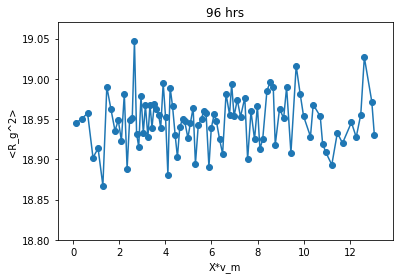

In [96]:
chi_vals = np.array(chi_val_list)
chi_v_m = chi_vals/0.2
plt.plot(chi_v_m, rg2)
plt.scatter(chi_v_m, rg2)
plt.ylabel("<R_g^2>")
plt.xlabel("X*v_m")
plt.title("96 hrs")
plt.ylim((18.8, 19.07))
#avg over 2000 polymers

To do:

- process 3 day run sim output

- add solvent to new sim